<a href="https://colab.research.google.com/github/Amrutha1103/002776773_Amrutha_Sai_Edara_AutoML/blob/main/AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shark Tank India 


Shark Tank India is a business reality television program that is shown on Sony Entertainment Television in India and is in the Hindi language. The program is the Shark Tank Indian franchise from the United States. It depicts business owners giving pitches to a group of sharks or investors, who determine whether to fund their enterprise. Shark Tank India's first season began on December 20th, 2021, and ended on February 4th, 2022.


Data Set:



This dataset conatins 28 variables (includes numerical and categorical) and following: Episode_number - Number of the episode

Pitch_number - Number of the Pitch

Brand_name - Name of the brand Idea

Idea - behind the brand building Deal

Deal - done or not ; 1 - YES, 0 - NO

Pitcher_ask_amount - Amount asked by the pitchers

Ask_equity - Equity offered by the pitchers

Ask_valuation - Valuation asked by pitchers

Deal_amount - Final Deal Amount

Deal_equity - Final Deal equity percentage

Deal_valuation - Final Valuation of Company after Deal

Ashneer_present - Ashneer was present during the pitching ; 1 - YES, 0 - NO

Anupam_present - Anupam was present during the pitching ; 1 - YES, 0 - NO

Aman_present - Aman was present during the pitching ; 1 - YES, 0 - NO

Namita_present - Namita was present during the pitching ; 1 - YES, 0 - NO

Vineeta_present - Vineeta was present during the pitching ; 1 - YES, 0 - NO

Peyush_present - Peyush was present during the pitching ; 1 - YES, 0 - NO

Ghazal_present - Ghazal was present during the pitching ; 1 - YES, 0 - NO

Ashneer_deal - Ashneer is a part of Final Deal ; 1 - YES, 0 - NO

Anupam_deal - Anupam is a part of Final Deal ; 1 - YES, 0 - NO

Aman_deal - Aman is a part of Final Deal ; 1 - YES, 0 - NO

Namita_deal - Namita is a part of Final Deal ; 1 - YES, 0 - NO

Vineeta_deal - Vineeta is a part of Final Deal ; 1 - YES, 0 - NO

Peyush_deal - Peyush is a part of Final Deal ; 1 - YES, 0 - NO

Ghazal_deal - Ghazal is a part of Final Deal ; 1 - YES, 0 - NO

Total_sharks_invested - Number of total sharks invested in the Company

Amount_per_shark - Amount per shark invested

Equity_per_shark - Final Equity gained per Shark

In [44]:
#installing required packages
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
#importing all the libraries required for the assignment
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
import pandas as pd
import logging
import csv
import numpy as np
import matplotlib.pylab as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor



H2O is an open-source platform that provides a fast and scalable machine learning and data analysis platform.



In [46]:
#for Initializing the H2o cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,33 mins 00 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_6vukt1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.089 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [47]:
#reading CSV file into pandas dataframe
url = "https://raw.githubusercontent.com/Amrutha1103/002776773_Amrutha_Sai_Edara_AutoML/main/Shark%20Tank%20India%20Dataset.csv"
data = pd.read_csv(url)  #to read the csv file from the url specified in the variable 'url' and store in dataframe 'data'

In [48]:
#to display information of dataframe "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   episode_number         117 non-null    int64  
 1   pitch_number           117 non-null    int64  
 2   brand_name             117 non-null    object 
 3   idea                   117 non-null    object 
 4   deal                   117 non-null    int64  
 5   pitcher_ask_amount     117 non-null    float64
 6   ask_equity             117 non-null    float64
 7   ask_valuation          117 non-null    float64
 8   deal_amount            117 non-null    float64
 9   deal_equity            117 non-null    float64
 10  deal_valuation         117 non-null    float64
 11  ashneer_present        117 non-null    int64  
 12  anupam_present         117 non-null    int64  
 13  aman_present           117 non-null    int64  
 14  namita_present         117 non-null    int64  
 15  vineet

In [49]:
#checking for the null values in the dataset
data.isnull().sum()

episode_number           0
pitch_number             0
brand_name               0
idea                     0
deal                     0
pitcher_ask_amount       0
ask_equity               0
ask_valuation            0
deal_amount              0
deal_equity              0
deal_valuation           0
ashneer_present          0
anupam_present           0
aman_present             0
namita_present           0
vineeta_present          0
peyush_present           0
ghazal_present           0
ashneer_deal             0
anupam_deal              0
aman_deal                0
namita_deal              0
vineeta_deal             0
peyush_deal              0
ghazal_deal              0
total_sharks_invested    0
amount_per_shark         0
equity_per_shark         0
dtype: int64

In [51]:
#checking for the shape of the dataframe
data.shape

(117, 28)

In [52]:
data.head() #to display the first few rows of a Pandas DataFrame 

,episode_number,pitch_number,brand_name,idea,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
0,1,1,BluePine Industries,Frozen Momos,1,50.0,5.0,1000.00,75.0,16.00,...,1,0,1,0,1,0,0,3,25.0,5.333333
1,1,2,Booz scooters,Renting e-bike for mobility in private spaces,1,40.0,15.0,266.67,40.0,50.00,...,1,0,0,0,1,0,0,2,20.0,25.000000
2,1,3,Heart up my Sleeves,Detachable Sleeves,1,25.0,10.0,250.00,25.0,30.00,...,0,1,0,0,1,0,0,2,12.5,15.000000
3,2,4,Tagz Foods,Healthy Potato Chips,1,70.0,1.0,7000.00,70.0,2.75,...,1,0,0,0,0,0,0,1,70.0,2.750000
4,2,5,Head and Heart,Brain Development Course,0,50.0,5.0,1000.00,0.0,0.00,...,0,0,0,0,0,0,0,0,0.0,0.000000


In [53]:
#displaying columns in the dataset
columns = list(data.columns)
print(columns)
#to check the statistical description of dataset
data.describe()

['episode_number', 'pitch_number', 'brand_name', 'idea', 'deal', 'pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount', 'deal_equity', 'deal_valuation', 'ashneer_present', 'anupam_present', 'aman_present', 'namita_present', 'vineeta_present', 'peyush_present', 'ghazal_present', 'ashneer_deal', 'anupam_deal', 'aman_deal', 'namita_deal', 'vineeta_deal', 'peyush_deal', 'ghazal_deal', 'total_sharks_invested', 'amount_per_shark', 'equity_per_shark']


,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,...,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,18.735043,59.000000,0.555556,319.854709,5.188034,3852.462479,31.982915,8.963504,467.104872,0.837607,...,0.179487,0.205128,0.239316,0.188034,0.128205,0.230769,0.059829,1.230769,18.132481,5.583590
std,10.070778,33.919021,0.499041,2767.842777,3.892121,11931.601957,36.687391,13.106769,919.988864,0.370397,...,0.385410,0.405532,0.428501,0.392420,0.335756,0.423137,0.238190,1.410457,23.588682,10.803799
min,1.000000,1.000000,0.000000,0.001010,0.250000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,30.000000,0.000000,45.000000,2.500000,666.670000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,59.000000,1.000000,50.000000,5.000000,1250.000000,25.000000,3.000000,100.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.250000
75%,27.000000,88.000000,1.000000,80.000000,7.500000,2857.140000,50.000000,15.000000,500.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,6.000000
max,35.000000,117.000000,1.000000,30000.000000,25.000000,120000.000000,150.000000,75.000000,6666.670000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,100.000000,75.000000


In [54]:
#To check the correlation between all the features in the dataset
data.corr()

,episode_number,pitch_number,deal,pitcher_ask_amount,ask_equity,ask_valuation,deal_amount,deal_equity,deal_valuation,ashneer_present,...,ashneer_deal,anupam_deal,aman_deal,namita_deal,vineeta_deal,peyush_deal,ghazal_deal,total_sharks_invested,amount_per_shark,equity_per_shark
episode_number,1.000000,0.998850,-0.214033,-0.069500,-0.077674,-0.070829,-0.187023,-0.114719,-0.146336,-0.342116,...,-0.116462,-0.121671,-0.264855,-0.041819,-0.035758,0.022564,0.229482,-0.121894,-0.157896,-0.073187
pitch_number,0.998850,1.000000,-0.223068,-0.074881,-0.080792,-0.073517,-0.199542,-0.119973,-0.151003,-0.338967,...,-0.117380,-0.129104,-0.272245,-0.053756,-0.028765,0.013214,0.226210,-0.131541,-0.166871,-0.079109
deal,-0.214033,-0.223068,1.000000,-0.106927,-0.076438,-0.151695,0.736002,0.609043,0.409138,-0.020728,...,0.373509,0.454369,0.461369,0.430422,0.342997,0.489898,0.225630,0.759342,0.653882,0.461046
pitcher_ask_amount,-0.069500,-0.074881,-0.106927,1.000000,0.470198,0.911174,-0.080719,-0.067233,-0.045988,0.040759,...,-0.044099,-0.050348,-0.053685,-0.045850,-0.036575,-0.052946,-0.024308,-0.084288,-0.071281,-0.050873
ask_equity,-0.077674,-0.080792,-0.076438,0.470198,1.000000,0.260603,-0.177955,0.288341,-0.310331,-0.047404,...,-0.088782,0.013584,-0.140932,0.027449,0.096837,-0.026575,0.071451,-0.028387,-0.165141,0.238074
ask_valuation,-0.070829,-0.073517,-0.151695,0.911174,0.260603,1.000000,-0.090163,-0.155565,0.017869,0.053817,...,-0.052650,-0.095488,-0.085926,-0.075664,-0.068814,-0.089131,-0.050633,-0.140668,-0.066631,-0.118541
deal_amount,-0.187023,-0.199542,0.736002,-0.080719,-0.177955,-0.090163,1.000000,0.370487,0.636411,-0.026851,...,0.392853,0.335148,0.482279,0.443929,0.315109,0.384539,0.188542,0.695950,0.793392,0.239212
deal_equity,-0.114719,-0.119973,0.609043,-0.067233,0.288341,-0.155565,0.370487,1.000000,-0.082694,-0.093570,...,0.127167,0.267897,0.150735,0.136270,0.359560,0.399927,0.188478,0.432880,0.359031,0.897922
deal_valuation,-0.146336,-0.151003,0.409138,-0.045988,-0.310331,0.017869,0.636411,-0.082694,1.000000,0.018973,...,0.206179,0.219510,0.360149,0.178616,-0.001066,0.138179,-0.002742,0.319298,0.581751,-0.080662
ashneer_present,-0.342116,-0.338967,-0.020728,0.040759,-0.047404,0.053817,-0.026851,-0.093570,0.018973,1.000000,...,0.205939,-0.005886,0.246972,-0.025346,-0.108422,-0.143856,-0.475201,-0.026656,-0.049810,-0.102568


<AxesSubplot:>

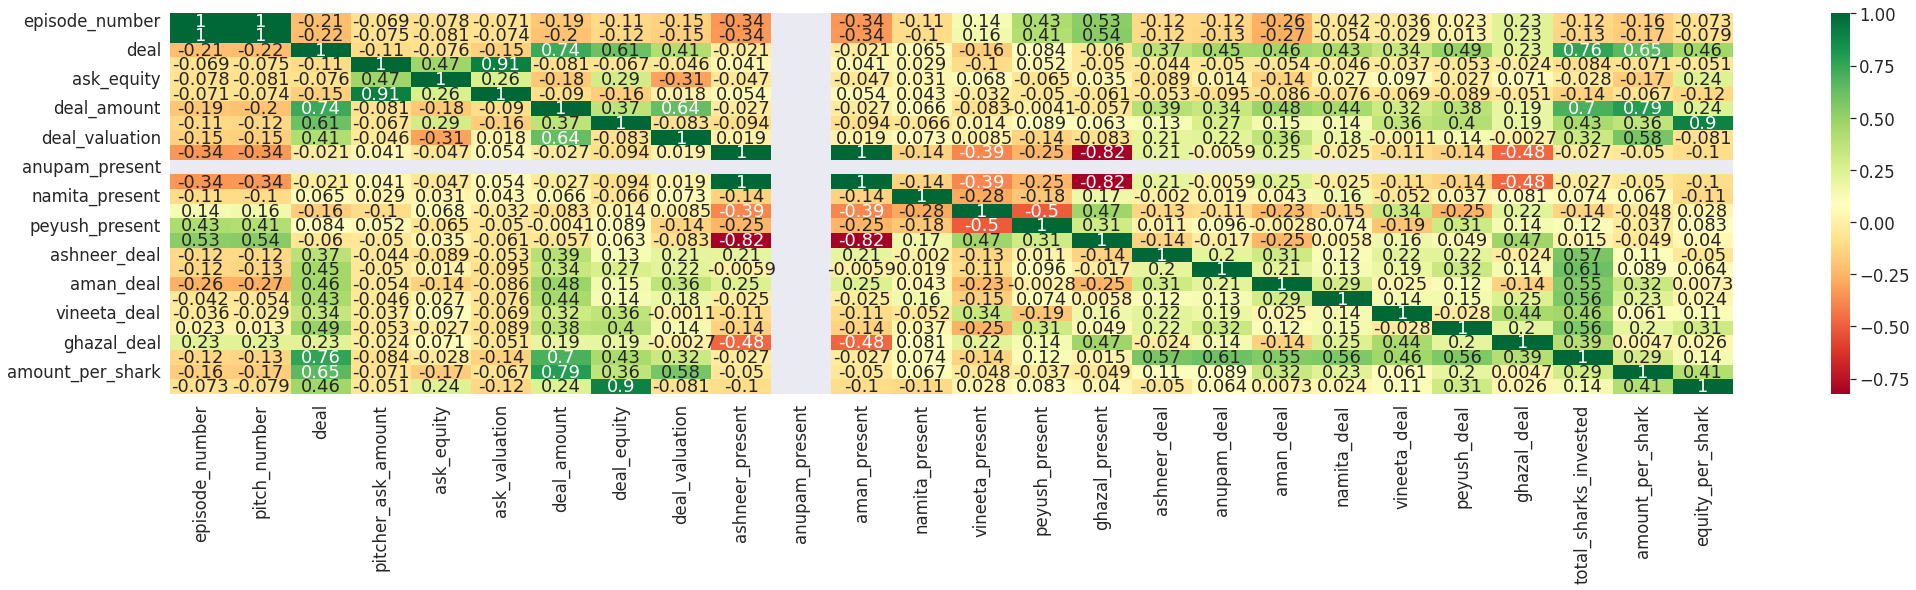

In [55]:
#To check the heatmap of the correlation. 
#The visual representation of the correlation structure of the data, which can help identify patterns and relationships between variables.
plt.figure(figsize=(35,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

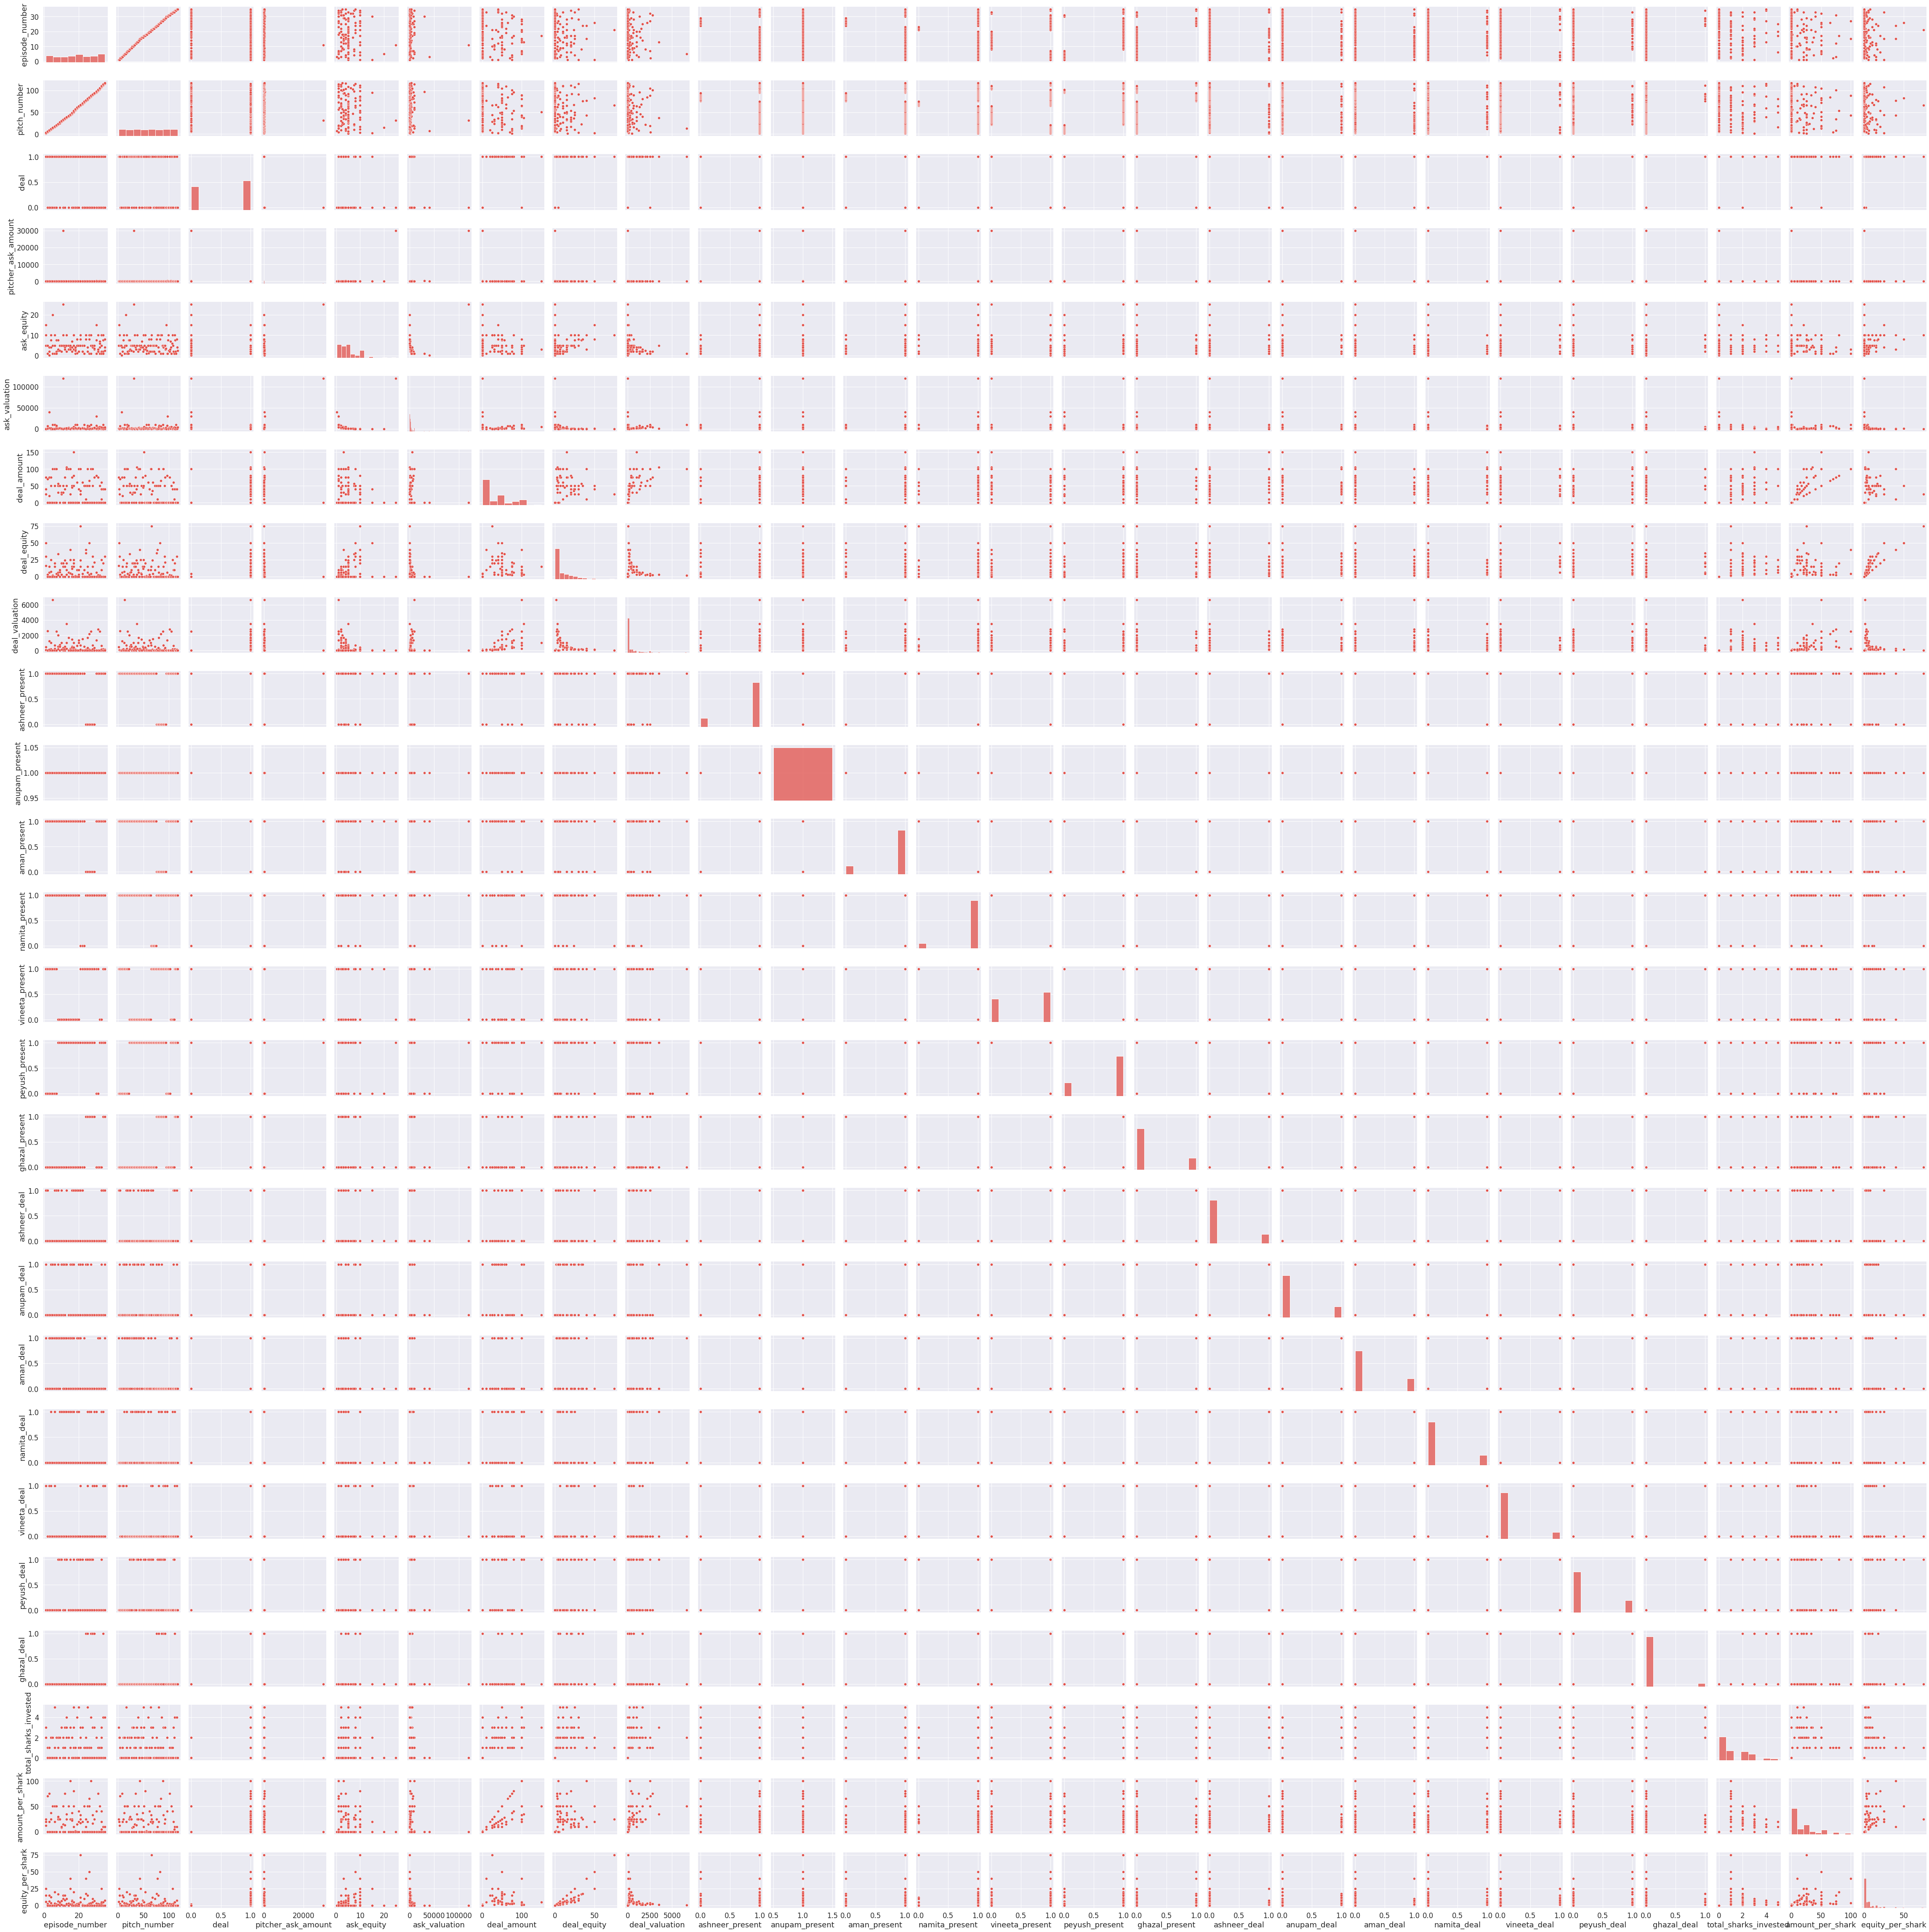

In [14]:
#to create the pairwise scatter plot of the dataset
sns.pairplot(data)

In [57]:
# To perform the linear regression method using Ordinary least square method
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm
model = sm.OLS(data['deal'], data[['amount_per_shark','deal_valuation','ask_valuation','pitcher_ask_amount','ask_equity', 'deal_amount', 'deal_equity','equity_per_shark']
]).fit() 
# summary() method is used to print out a summary of the regression analysis results, including the R-squared value, coefficients, standard errors, t-values, and p-values. 
# Print out the statistics
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   deal   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              81.43
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                    2.00e-42
Time:                        03:31:08   Log-Likelihood:                         -17.992
No. Observations:                 117   AIC:                                      51.98
Df Residuals:                     109   BIC:                                      74.08
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
amount_per_shark       0.0063      0.002      2.616      0.010       0.002       0.011
deal_valuation      8.324e-05   4.45e-05      1.870      0.064      -5e-06       0.000
ask_valuation       5.368e-06   5.21e-06      1.031      0.305   -4.95e-06    1.57e-05
pitcher_ask_amount -3.021e-05   2.33e-05     -1.295      0.198   -7.64e-05     1.6e-05
ask_equity             0.0105      0.006      1.745      0.084      -0.001       0.022
deal_amount            0.0037      0.002      2.184      0.031       0.000       0.007
deal_equity            0.0335      0.006      5.224      0.000       0.021       0.046
equity_per_shark      -0.0219      0.007     -2.945      0.004      -0.037      -0.007
==============================================================================
Omnibus:                       19.411   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.770
Skew:                           0.589   Prob(JB):                     6.98e-11
Kurtosis:                       5.864   Cond. No.                     4.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Considering the significance value of 0.05, Except pitcher_ask_amount, ask_valuation, ask_equity, deal_valuation has the p-value graeter than 0.05, hence it is a non significant feature, all other features i.e amount_per_shark, deal_amount, deal_equity, equity_per_shark are significant.

The Variance Inflation Factor (VIF) is the measure of multicollinearity that exists in the set of variables that are involved in multiple regressions.

Generally, the vif value above 10 indicates that there is a high correlation with the other independent variables.

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = data[['pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation','total_sharks_invested', 'amount_per_shark', 'equity_per_shark']]
  
# VIF dataframe
vif = pd.DataFrame()
vif["features"] = X.columns

# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif)

                features        VIF
0     pitcher_ask_amount   5.745616
1             ask_equity   2.133708
2          ask_valuation   5.791167
3            deal_amount  15.333698
4            deal_equity  18.994681
5         deal_valuation   2.905794
6  total_sharks_invested   7.461022
7       amount_per_shark   8.453980
8       equity_per_shark  13.508322


VIF for 'deal-amount', 'deal_equity' and 'equity_per_shark' is greater than 10, which indicates they highly correlated with other variables

Ordinary least squares (OLS) regression is a statistical method of analysis used for multivariate model that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable.

In [60]:
import statsmodels.api as sm
model = sm.OLS(data['deal'], data[['amount_per_shark','deal_valuation','ask_valuation','pitcher_ask_amount','ask_equity', 'deal_amount', 'deal_equity','equity_per_shark']
]).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   deal   R-squared (uncentered):                   0.857
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              81.43
Date:                Wed, 01 Mar 2023   Prob (F-statistic):                    2.00e-42
Time:                        03:31:20   Log-Likelihood:                         -17.992
No. Observations:                 117   AIC:                                      51.98
Df Residuals:                     109   BIC:                                      74.08
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
amount_per_shark       0.0063      0.002      2.616      0.010       0.002       0.011
deal_valuation      8.324e-05   4.45e-05      1.870      0.064      -5e-06       0.000
ask_valuation       5.368e-06   5.21e-06      1.031      0.305   -4.95e-06    1.57e-05
pitcher_ask_amount -3.021e-05   2.33e-05     -1.295      0.198   -7.64e-05     1.6e-05
ask_equity             0.0105      0.006      1.745      0.084      -0.001       0.022
deal_amount            0.0037      0.002      2.184      0.031       0.000       0.007
deal_equity            0.0335      0.006      5.224      0.000       0.021       0.046
equity_per_shark      -0.0219      0.007     -2.945      0.004      -0.037      -0.007
==============================================================================
Omnibus:                       19.411   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.770
Skew:                           0.589   Prob(JB):                     6.98e-11
Kurtosis:                       5.864   Cond. No.                     4.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Regularization

In [61]:
from sklearn.model_selection import  train_test_split
X = data[ ['pitcher_ask_amount', 'ask_equity', 'ask_valuation', 'deal_amount',
       'deal_equity', 'deal_valuation','total_sharks_invested', 'amount_per_shark', 'equity_per_shark']]

y = data['deal']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

In [63]:
# to get rmse after regularization using ridge regression
y_pred = ridge.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

0.27640965231695214

In [64]:

#To train a maximum of 20 models within a time limit of 300 seconds, using a random seed of 1234, and excluding deep learning algorithms from the search.

aml = H2OAutoML(
    max_models=20,
    max_runtime_secs=300,
    seed=1234,
)


In [65]:
#The below code creates an H2OFrame object named data using the data provided as input to the function.
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [66]:
train, test = data.split_frame(ratios=[0.8], seed = 1) # splits a given H2OFrame object named data into two subsets - train and test with 80:20 (train:test) ratio

In [67]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

# to  merges the "train" and "test" datasets into a single dataset called "drift_data" using the "rbind" function 
drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()
     

In [68]:
#training an H2O AutoML model on a dataset called "train" using the "MAE" (Mean Absolute Error) metric as the evaluation metric
x = list(set(train.col_names) - set(["deal"])) #contains all of the column names in the "train" dataset, except for the "deal" column. It uses the "set" function to remove any duplicates in the list of column names.
from h2o.automl import H2OAutoML
# Run AutoML for 10 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=10, seed=1234, sort_metric="MAE", project_name = "random_split")
aml.train(x=x, y="deal", training_frame=train)

AutoML progress: |
03:05:27.834: _train param, Dropping bad and constant columns: [brand_name, anupam_present, idea, is_train]
03:05:27.834: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:05:30.458: _train param, Dropping bad and constant columns: [brand_name, anupam_present, idea, is_train]
03:05:30.458: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:05:31.854: _train param, Dropping bad and constant columns: [brand_name, anupam_present, idea, is_train]
03:05:31.855: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_8_AutoML_2_20230301_33146


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          5387                   1            5            3.775         2             8             6.1

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.01254493676059145
RMSE: 0.11200418188885382
MAE: 0.03713428928878986
RMSLE: 0.07801204932260837
Mean Residual Deviance: 0.01254493676059145

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.026624151988762293
RMSE: 0.1631690901756895
MAE: 0.061865972269191265
RMSLE: 0.11046127994010044
Mean Residual Deviance: 0.026624151988762293

Cross-Validation Metrics Summary: 
                        mean       sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     0.0608335  0.0194585  0.0348373     0.077037      0.0697417     0.0455208     0.0770305
mean_residual_deviance  0.0278581  0.0236334  0.00573158    0.0500775     0.0539769     0.00414233    0.025362
mse                     0.0278581  0.0236334  0.00573158    0.0500775     0.0539769     0.00414233    0.025362
r2                      0.879395   0.102092   0.976842      0.791344      0.762739      0.983431      0.882619
residual_deviance       0.0278581  0.0236334  0.00573158    0.0500775     0.0539769     0.00414233    0.025362
rmse                    0.151086   0.0793013  0.0757072     0.22378       0.232329      0.0643609     0.159255
rmsle                   0.0992814  0.0599081  0.0412421     0.158175      0.162444      0.0400663     0.0944804

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-03-01 03:31:52  0.587 sec   0                  0.496904         0.493827        0.246914
    2023-03-01 03:31:52  0.597 sec   5                  0.311719         0.305093        0.0971687
    2023-03-01 03:31:52  0.610 sec   10                 0.212689         0.193975        0.0452367
    2023-03-01 03:31:52  0.622 sec   15                 0.164544         0.128824        0.0270747
    2023-03-01 03:31:52  0.635 sec   20                 0.143759         0.0908287       0.0206667
    2023-03-01 03:31:52  0.648 sec   25                 0.132164         0.0674203       0.0174674
    2023-03-01 03:31:52  0.659 sec   30                 0.122858         0.0495525       0.0150941
    2023-03-01 03:31:52  0.669 sec   35                 0.116644         0.0420662       0.0136059
    2023-03-01 03:31:52  0.680 sec   40                 0.112004         0.0371343       0.0125449

Variable Importances: 
variable               relative_importance    scaled_importance       percentage
---------------------  ---------------------  ----------------------  ----------------------
equity_per_shark       52.364288330078125     1.0                     0.4323083822132073
total_sharks_invested  40.81037902832031      0.7793551737220645      0.3369217743212788
deal_equity            24.180736541748047     0.4617791497389376      0.1996309971634305
pitcher_ask_amount     0.8711336255073547     0.016636025300604998    0.007191893184162532
pitch_number           0.8163759112358093     0.01559031808261742     0.006739825188485648
ask_valuation          0.601269006729126      0.01148242487206221     0.0049639485203259075
ask_equity             0.5941385626792908     0.011346254892917483

Leaderboard shows models with their metrics. when provided with H2OAutoML object, the leaderboard shows the 5-fold cross-validation by default. Otherwise it shows metrics computed on the frame

In [69]:
# To view the leader model
lb = aml.leaderboard
#to view the entire leaderboard, specify the rows argument of the head() method as the total number of rows
lb.head(rows=lb.nrows)

model_id,mae,rmse,mse,rmsle,mean_residual_deviance
GBM_8_AutoML_2_20230301_33146,0.061866,0.163169,0.0266242,0.110461,0.0266242
GBM_3_AutoML_1_20230301_30527,0.061866,0.163169,0.0266242,0.110461,0.0266242
GBM_2_AutoML_1_20230301_30527,0.0642086,0.176209,0.0310495,0.117259,0.0310495
GBM_7_AutoML_2_20230301_33146,0.0642086,0.176209,0.0310495,0.117259,0.0310495
GBM_4_AutoML_1_20230301_30527,0.0647169,0.172592,0.0297879,0.115546,0.0297879
GBM_9_AutoML_2_20230301_33146,0.0647169,0.172592,0.0297879,0.115546,0.0297879
DRF_1_AutoML_1_20230301_30527,0.0663175,0.183735,0.0337584,0.125993,0.0337584
DRF_2_AutoML_2_20230301_33146,0.0663175,0.183735,0.0337584,0.125993,0.0337584
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_30527,0.0675103,0.16782,0.0281636,0.114989,0.0281636
XGBoost_1_AutoML_1_20230301_30527,0.0680368,0.185395,0.0343713,0.12383,0.0343713


In [70]:
#index values are assigned to different models generated and creates a dictionary to store the index values.
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict


{'GBM_8_AutoML_2_20230301_33146': 0, 'GLM_1_AutoML_1_20230301_30527': 20}

In [71]:
# to get leaderboard with all possible columns(such as training time, prediction speed,..)
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,mae,rmse,mse,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_8_AutoML_2_20230301_33146,0.061866,0.163169,0.0266242,0.110461,0.0266242,98,0.015867,GBM
GBM_3_AutoML_1_20230301_30527,0.061866,0.163169,0.0266242,0.110461,0.0266242,153,0.013144,GBM
GBM_2_AutoML_1_20230301_30527,0.0642086,0.176209,0.0310495,0.117259,0.0310495,163,0.109305,GBM
GBM_7_AutoML_2_20230301_33146,0.0642086,0.176209,0.0310495,0.117259,0.0310495,99,0.052402,GBM
GBM_4_AutoML_1_20230301_30527,0.0647169,0.172592,0.0297879,0.115546,0.0297879,226,0.028442,GBM
GBM_9_AutoML_2_20230301_33146,0.0647169,0.172592,0.0297879,0.115546,0.0297879,99,0.03436,GBM
DRF_1_AutoML_1_20230301_30527,0.0663175,0.183735,0.0337584,0.125993,0.0337584,125,0.009906,DRF
DRF_2_AutoML_2_20230301_33146,0.0663175,0.183735,0.0337584,0.125993,0.0337584,63,0.009634,DRF
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_30527,0.0675103,0.16782,0.0281636,0.114989,0.0281636,856,0.069255,StackedEnsemble
XGBoost_1_AutoML_1_20230301_30527,0.0680368,0.185395,0.0343713,0.12383,0.0343713,288,0.007496,XGBoost


Pareto Front plot shows a Pareto front for any given dataframe,but it can also be used with AutoMLs. It is used to determine the optimal subset with regards to multiple criteria. The pareto_front function returns a subset of the input frame/leaderboard and a plot depicting a pareto front as shown below:

model_id,mae,rmse,mse,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_3_AutoML_1_20230301_30527,0.061866,0.163169,0.0266242,0.110461,0.0266242,153,0.013144,GBM
DRF_2_AutoML_2_20230301_33146,0.0663175,0.183735,0.0337584,0.125993,0.0337584,63,0.009634,DRF
XGBoost_4_AutoML_2_20230301_33146,0.0680368,0.185395,0.0343713,0.12383,0.0343713,1089,0.00681,XGBoost
GLM_2_AutoML_2_20230301_33146,0.476398,0.493083,0.243131,nan,0.243131,5,0.003767,GLM


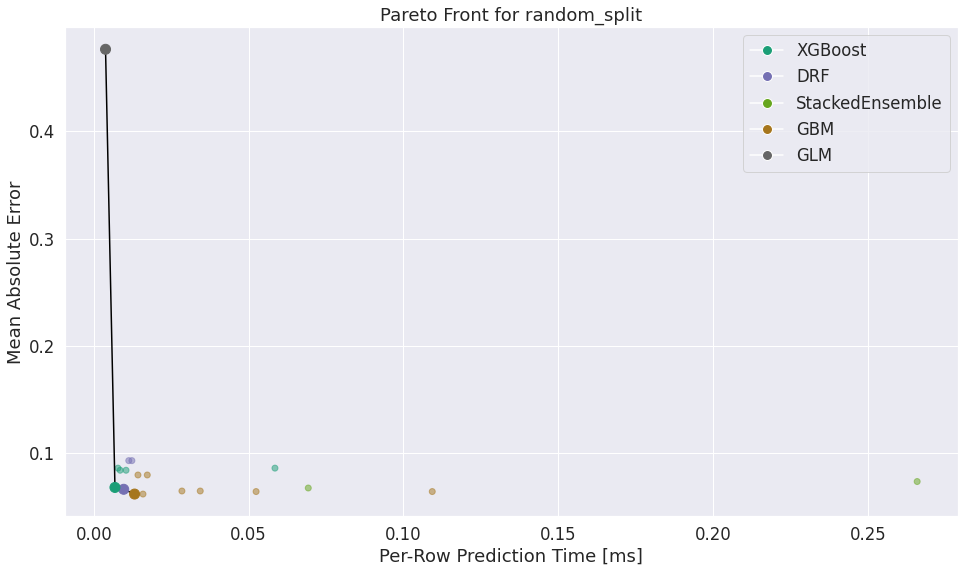

In [72]:
pf = aml.pareto_front()
pf.figure()
pf

In [73]:
# to get the best model
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_8_AutoML_2_20230301_33146


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    40                 40                          5387                   1            5            3.775         2             8             6.1

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.01254493676059145
RMSE: 0.11200418188885382
MAE: 0.03713428928878986
RMSLE: 0.07801204932260837
Mean Residual Deviance: 0.01254493676059145

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.026624151988762293
RMSE: 0.1631690901756895
MAE: 0.061865972269191265
RMSLE: 0.11046127994010044
Mean Residual Deviance: 0.026624

In [74]:
#to evaluate the performance of the model
best_model.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.00257630204085238
RMSE: 0.05075728559381776
MAE: 0.03730634441865136
RMSLE: 0.034580948219641056
Mean Residual Deviance: 0.00257630204085238

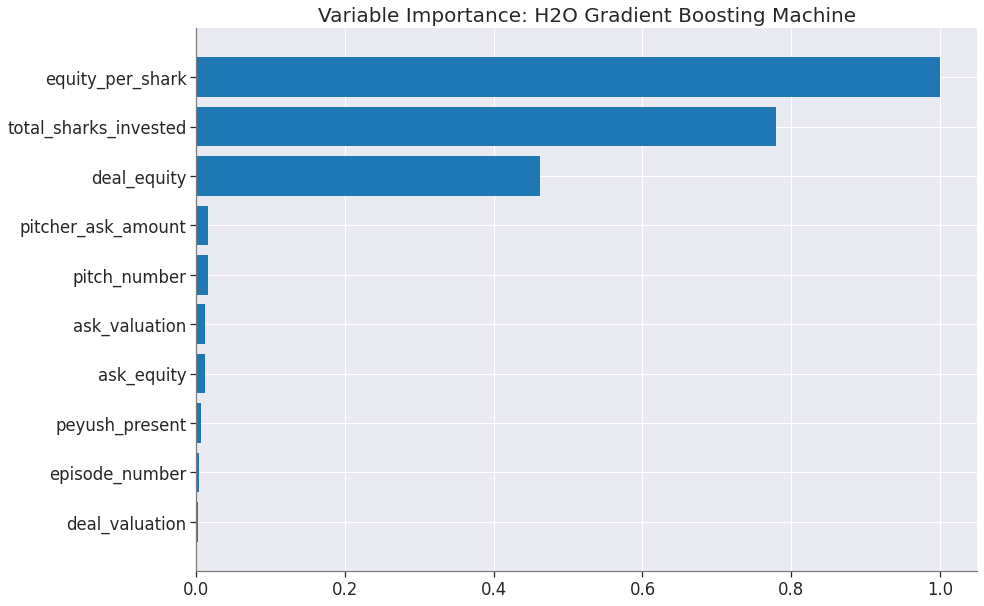

<Figure size 432x288 with 0 Axes>

In [75]:
#to check if the best_model is present in (gbm, drf, xrt, xgboost) and generate a the plot which shows features that were most important in predicting the target variable and which features had less impact on the predictions
if best_model.algo in ['gbm','drf','xrt','xgboost']:
    best_model.varimp_plot()
     

From the above plot, 'equity_per_shark', 'total_sharks_invested', 'deal_equity', 'pitcher_ask_amount' are some of the important independent features used in depicting the target variable.

20
glm


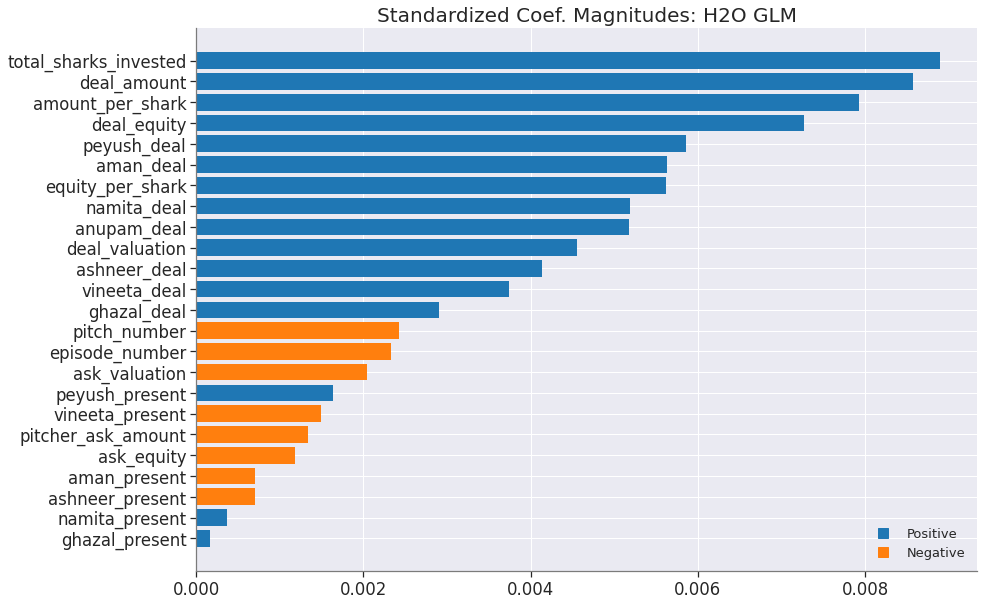

In [76]:
#To generates a standard coefficient plot for the GLM model.
if glm_index != 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo) 
  glm_model1.std_coef_plot()

In [80]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

h2o.init()  # initialize h2o

# create a H2O generalized linear model with no regularization
house_glm = H2OGeneralizedLinearEstimator(family='gaussian', lambda_=0, compute_p_values=True)

# create a H2O generalized linear model with L1 regularization and a regularization parameter of 0.001
alm_glm_regularization = H2OGeneralizedLinearEstimator(family='gaussian', lambda_=0.001, alpha=1)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,36 mins 47 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_6vukt1
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.088 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [82]:
#To train a GLM model with regularization with predictor and response variable and the training dataset specified in training_frame where trained model is stored in house_glm_regularization
alm_glm_regularization.train(x = x, y = 'deal', training_frame = train)
     

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677639442141_30


GLM Model: summary
    family    link      regularization           number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -----------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Lasso (lambda = 0.001 )  24                            20                             1                       py_267_sid_8ef7

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.03307391284540549
RMSE: 0.1818623458701814
MAE: 0.12710499099928507
RMSLE: 0.11718426098558225
Mean Residual Deviance: 0.03307391284540549
R^2: 0.8660506529761078
Null degrees of freedom: 98
Residual degrees of freedom: 78
Null deviance: 24.444444444444485
Residual deviance: 3.274317371695144
AIC: -12.542203876260245

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae         training_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  -------------------  ------------------
    2023-03-01 03:35:11  0.000 sec   0             24.444444444444485         0.246913580246914
    2023-03-01 03:35:11  0.009 sec   1                                                           0.1818623458701814  0.03307391284540549  0.12710499099928507  0.8660506529761078

Variable Importances: 
variable               relative_importance    scaled_importance     percentage
---------------------  ---------------------  --------------------  ---------------------
amount_per_shark       0.3318769335746765     1.0                   0.23350585797083745
total_sharks_invested  0.29529520869255066    0.8897732225976033    0.2077672597421303
deal_amount            0.24525859951972961    0.7390046571722446    0.17256191651744957
deal_equity            0.11727356910705566    0.3533646277970916    0.08251271059030552
ask_equity             0.05440722033381462    0.1639379385237459    0.03828046898895769
deal_valuation         0.05121529474854469    0.15432013968822755   0.036034656620079056
pitcher_ask_amount     0.0455666184425354     0.13729974527525377   0.03206029481967557
peyush_deal            0.043603625148534775   0.13138492235322347   0.030679149018521305
vineeta_deal           0.04041430726647377    0.12177498095805456   0.028435171407992923
namita_deal            0.04008543863892555    0.12078404548084033   0.028203782169192275
---                    ---                    ---                   ---
ghazal_present         0.01406770572066307    0.04238832017982852   0.009897921071533422
ashneer_present        0.009709098376333714   0.0292551165631071    0.006831241093105181
aman_present           0.009709098376333714   0.0292551165631071    0.006831241093105181
ghazal_deal            0.00449017807841301    0.013529647963324521  0.003159252055719486
namita_present         0.0029021159280091524  0.008744554485152671  0.002041904697628309
ashneer_deal           0.0012452979572117329  0.003752288367252631  0.0008761813145493185
pitch_number           0.0                    0.0                   0.0
peyush_present         0.0                    0.0                   0.0
aman_deal              0.0                    0.0                   0.0
equity_per_shark       0.0                    0.0                   0.0
[24 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_4_AutoML_1_20230301_30527,0.0483546,0.00233816,0.0363387,0.0310163,0.00233816,226,0.021815,GBM
GBM_9_AutoML_2_20230301_33146,0.0483546,0.00233816,0.0363387,0.0310163,0.00233816,99,0.025303,GBM
GBM_8_AutoML_2_20230301_33146,0.0507573,0.0025763,0.0373063,0.0345809,0.0025763,98,0.02845,GBM
GBM_3_AutoML_1_20230301_30527,0.0507573,0.0025763,0.0373063,0.0345809,0.0025763,153,0.021071,GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_30527,0.0512691,0.00262852,0.0396251,0.038378,0.00262852,856,0.300475,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20230301_30527,0.0564676,0.00318859,0.0443447,0.0420012,0.00318859,1066,0.232366,StackedEnsemble
XGBoost_1_AutoML_1_20230301_30527,0.062015,0.00384587,0.0416728,0.0428254,0.00384587,288,0.024298,XGBoost
XGBoost_4_AutoML_2_20230301_33146,0.062015,0.00384587,0.0416728,0.0428254,0.00384587,1089,0.02667,XGBoost
GBM_2_AutoML_1_20230301_30527,0.0629376,0.00396114,0.0451186,0.0400392,0.00396114,163,0.022606,GBM
GBM_7_AutoML_2_20230301_33146,0.0629376,0.00396114,0.0451186,0.0400392,0.00396114,99,0.023358,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

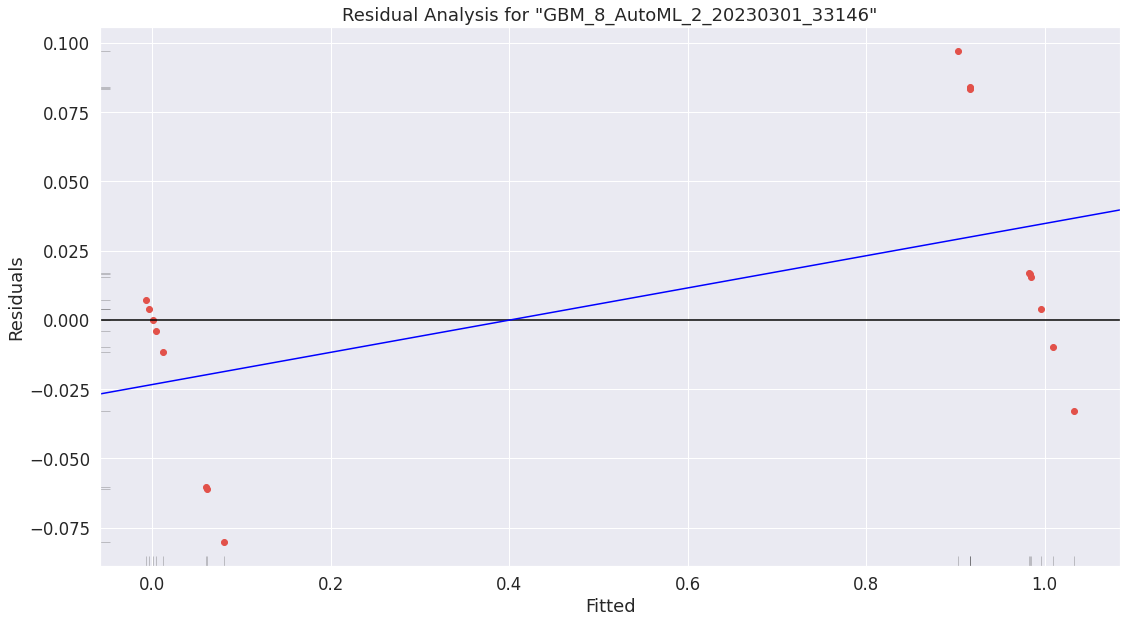

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

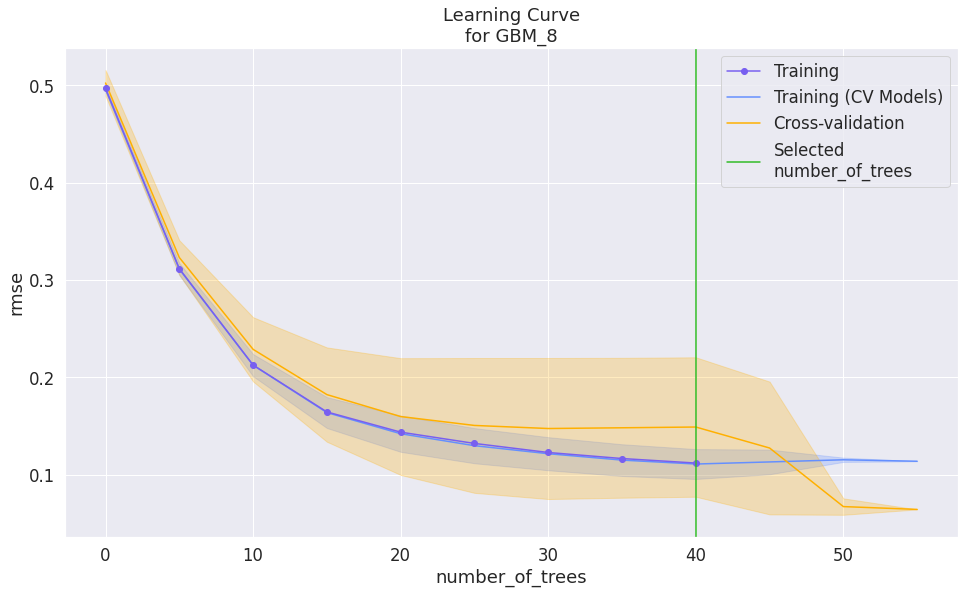

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

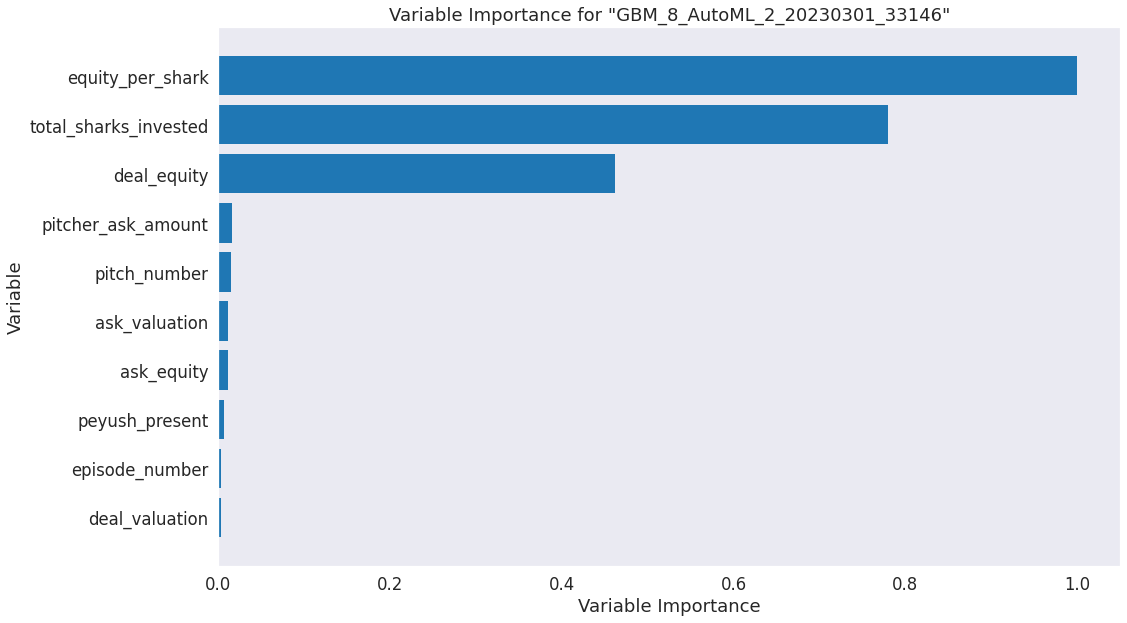

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

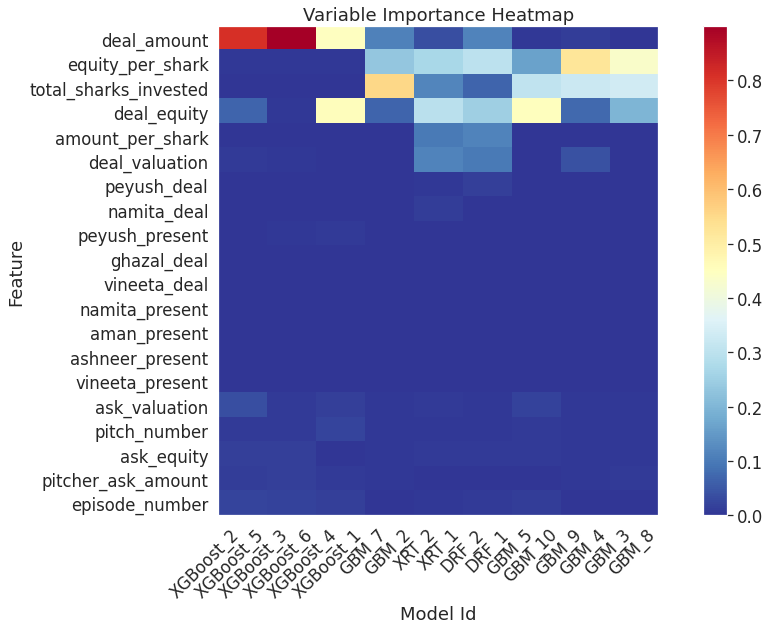

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

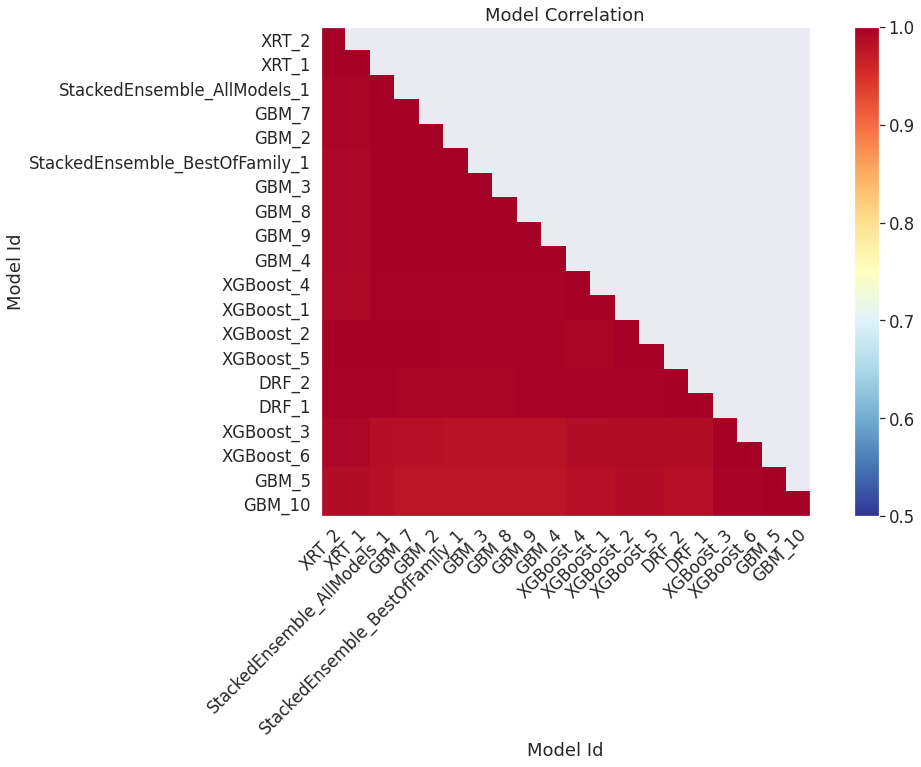

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:609: RuntimeWarning: invalid value encountered in true_divide
  res = (res - np.nanmin(res)) / (np.nanmax(res) - np.nanmin(res))


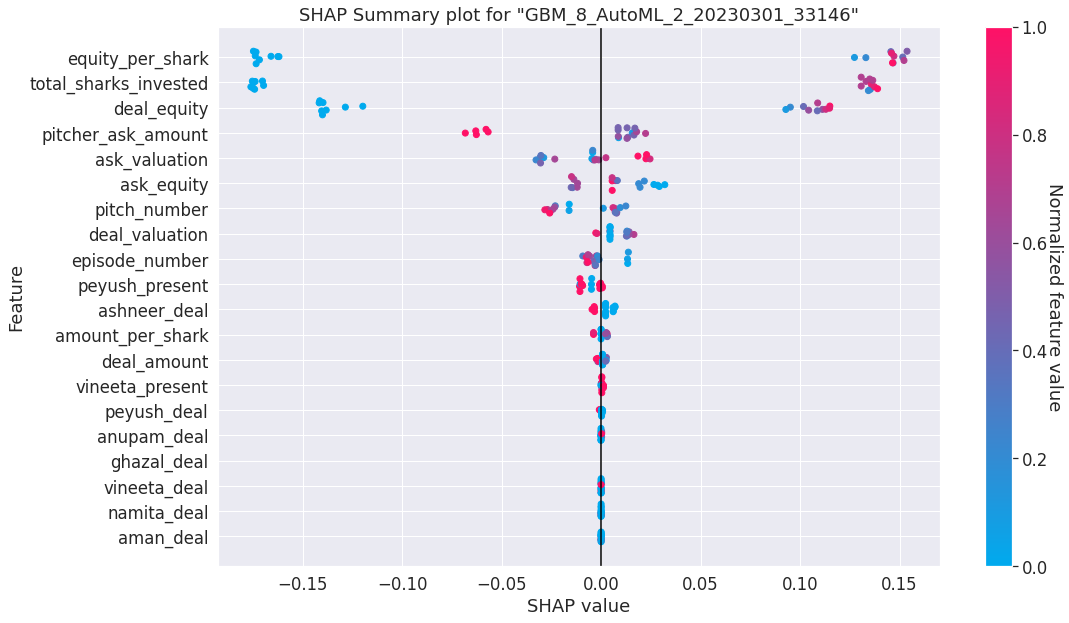

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

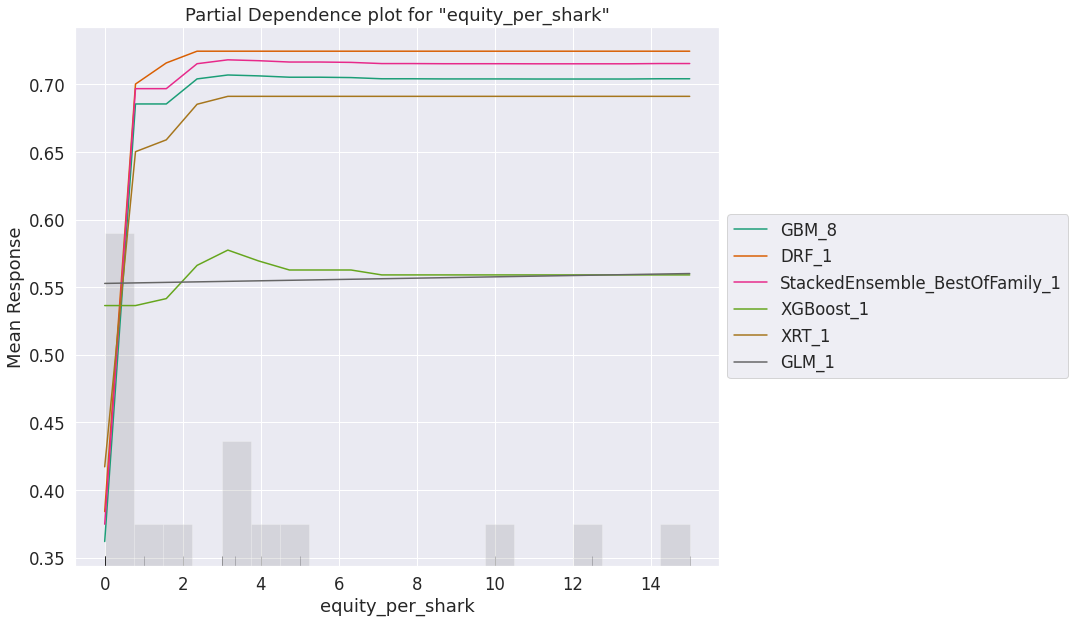

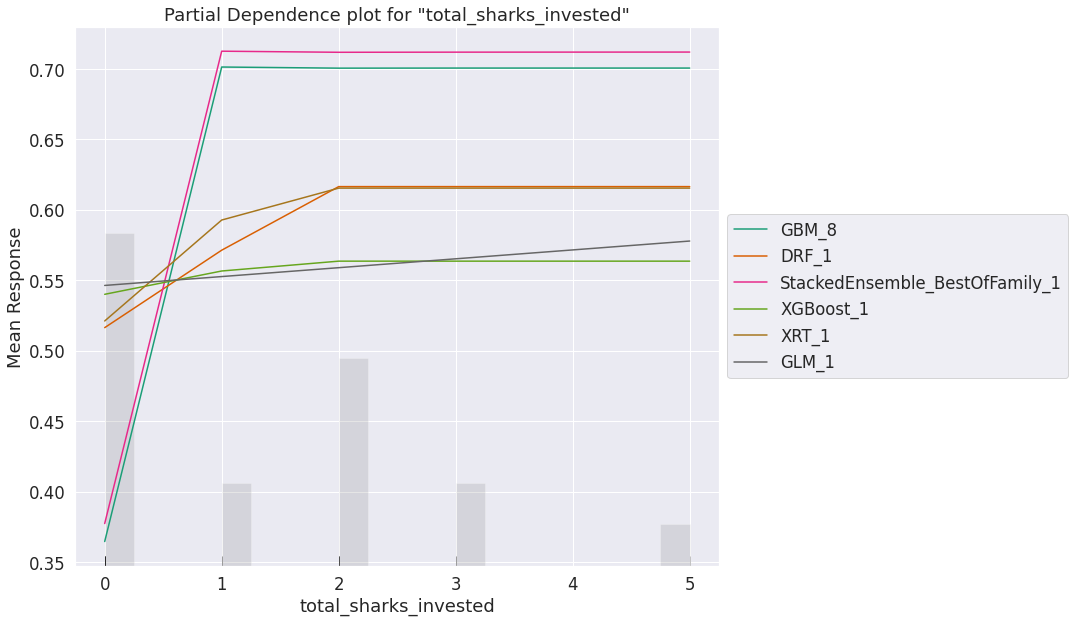

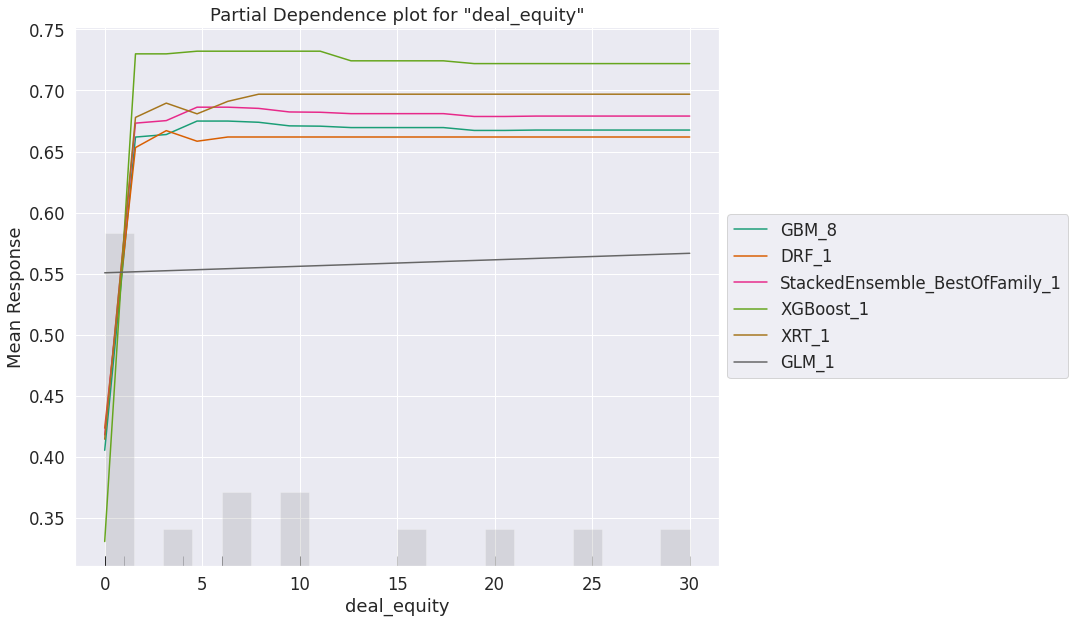

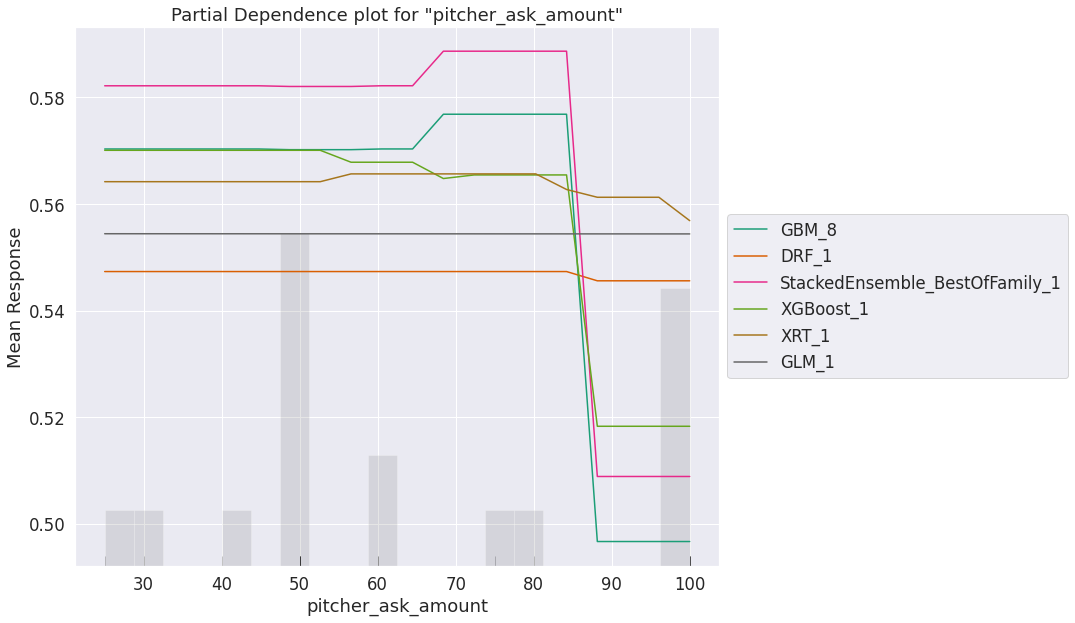

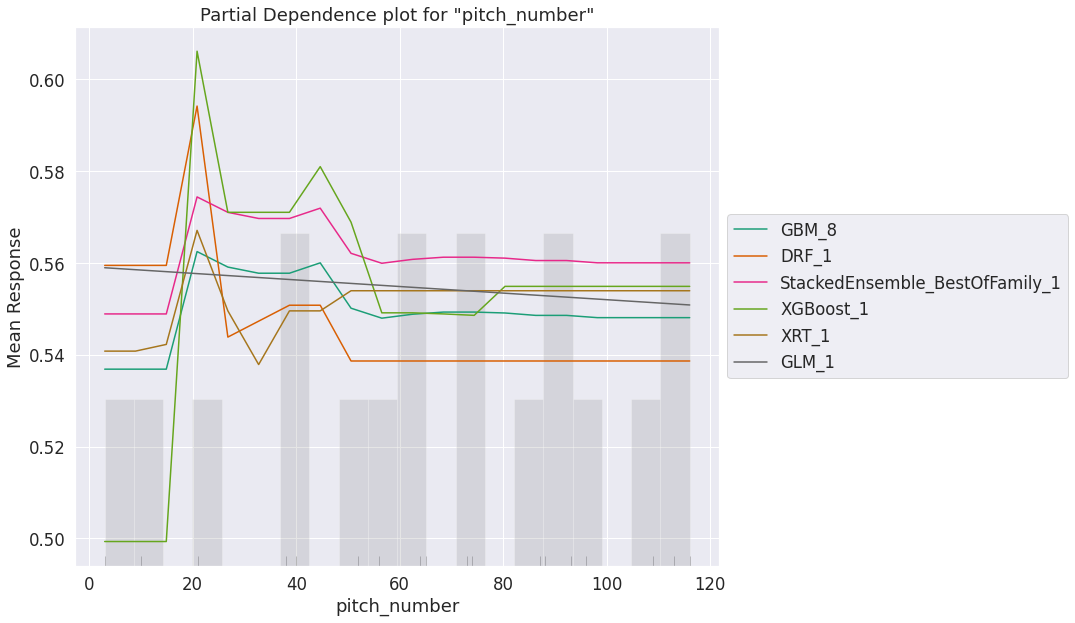

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

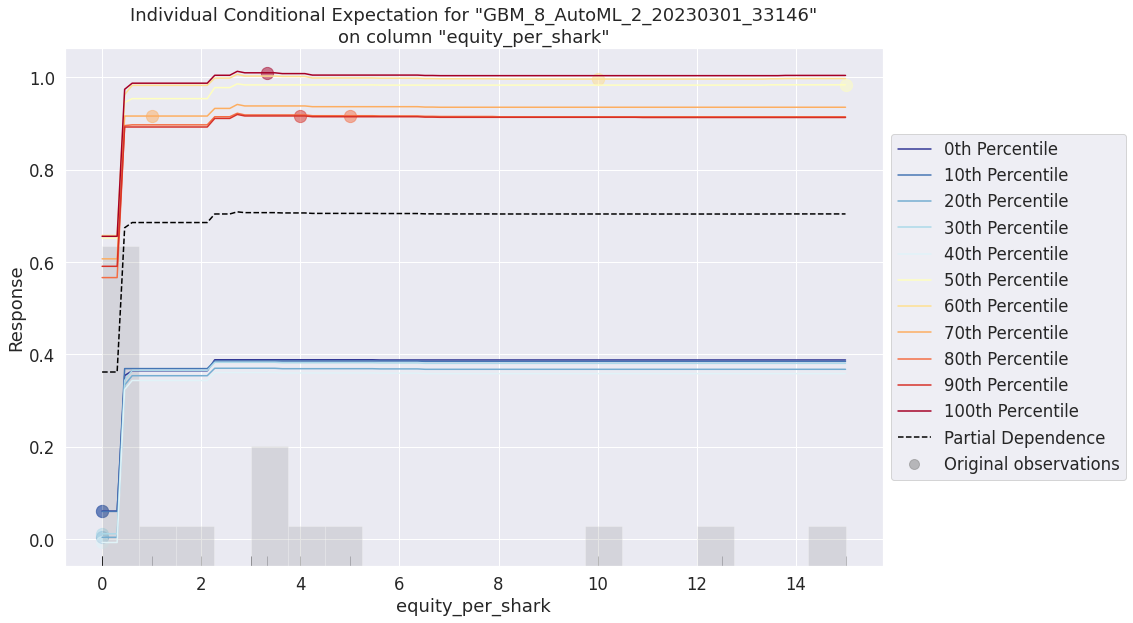

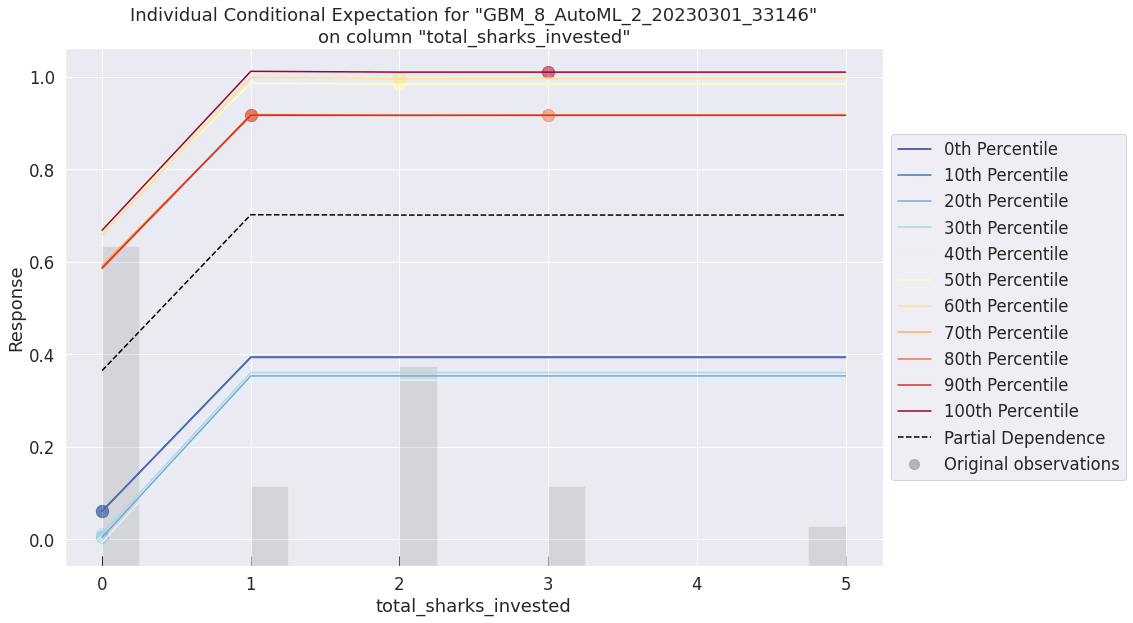

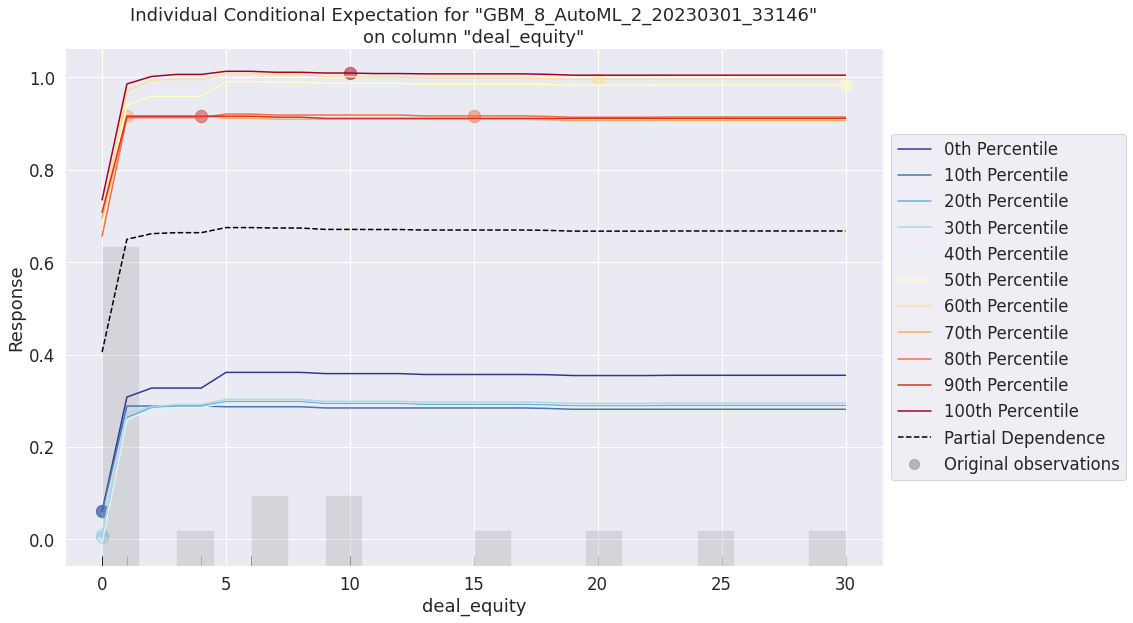

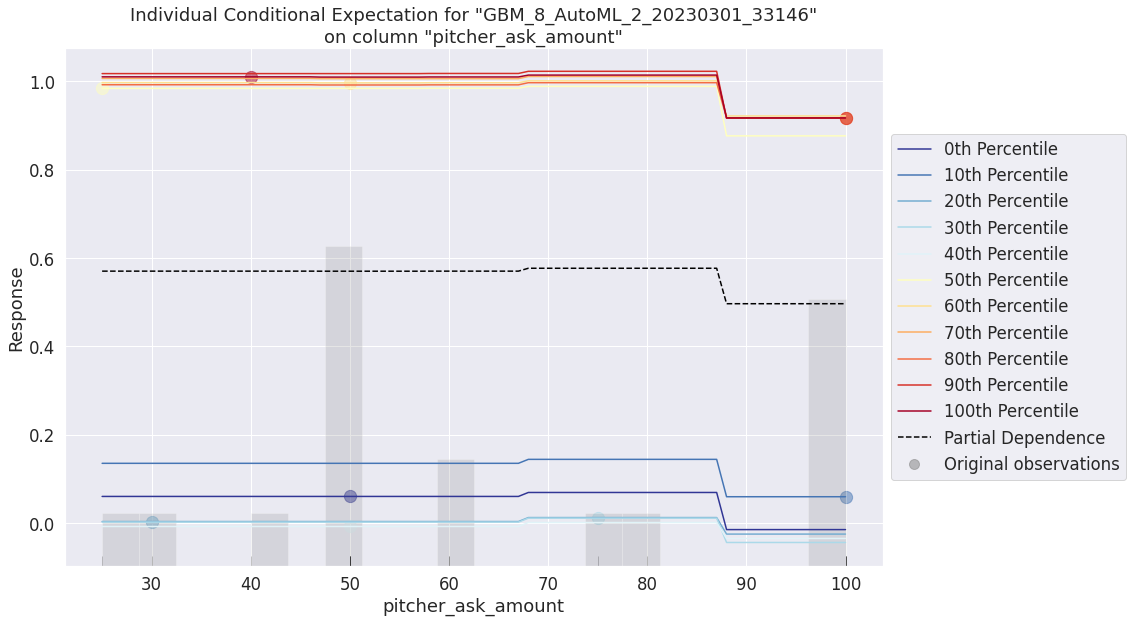

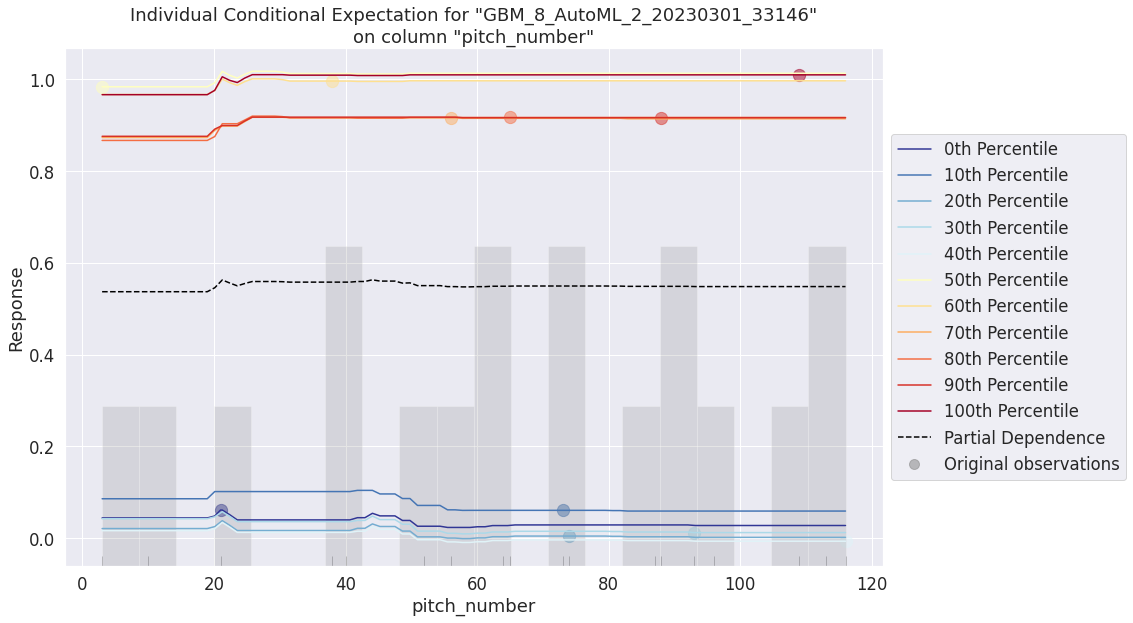

In [83]:
#To report or analysis of the model's performance.
exa = aml.explain(test)

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

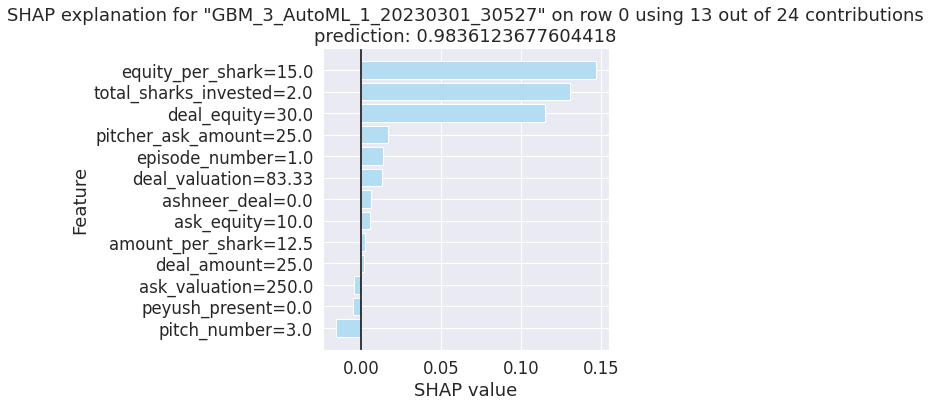

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [43]:
aml.explain_row(frame = test, row_index = 0, figsize = (8,6), exclude_explanations = "leaderboard")

##Conclusion


As part of classification to predict "deal", GBM is one of the best performing model . VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of SharkTank India. 








##Questions






* Is the relationship significant?

yes, because the R-sqaured is 0.857 which is very high and Considering     the significance value of 0.05, Except pitcher_ask_amount, ask_valuation, ask_equity, deal_valuation, all other features i.e amount_per_shark, deal_amount, deal_equity, equity_per_shark are significant. So the relationship is very much significant.





* Are any model assumptions violated?


no, the model is a classification example hence it did not violate any of the models





* Is there any multicollinearity in the model?

Yes, most of the variables are correlated with eachother where VIF for 'deal-amount', 'deal_equity' and 'equity_per_shark' is greater than 10, which indicates they highly correlated with other variables. On the other hand, ask_equity, deal_valuation, pitcher_ask_amount and ask_valuation are having less VIF values.





* In the multivariate models are predictor variables independent of all the other predictor variables?

No, they are not all independent of each other,especially 'deal-amount', 'deal_equity' and 'equity_per_shark' 





* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

Most significant predictor is 'equity_per_shark' and least significant one is 'deal_valuation'





* Does the model make sense?


yes, For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.857 which is considered good in terms of accuracy. So overall the model makes sense. 




* Does regularization help?

No, the rmse from the best model is 0.163 which is very high, however, in regularization, the rmse is 0.276




* Which independent varibles are significant?


equity_per_shark, total_sharks_invested, deal_equity are the significant variables






* Which hyperparameters are important?


all hyperparameters are important because they determined the way model works

##Conclusion:




##References:


H2O AI AutoML - https://docs.h2o.ai/


https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e


http://net-informations.com/ds/mla/ols.html



##Licences:

MIT License

Copyright (c) 2023 Amrutha Sai Edara

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE